In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [13]:
d1 = pd.read_csv('Ph1.csv')
d1.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [14]:
d1.describe()

,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


In [7]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [10]:
from scipy import stats

a = np.abs(stats.zscore(data))
print(a)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


In [ ]:
#Normalizing the data

In [15]:
norm_data = d1.copy()
norm_data = (norm_data - norm_data.min())/(norm_data.max() - norm_data.min())
norm_data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [16]:
#splitting the data for training & testing

In [17]:
data_train,data_test = train_test_split(norm_data,test_size=0.1)

In [18]:
data_train.head()

,X,Y
20,0.428571,0.537445
23,0.571429,0.079295
4,0.333333,0.599119
10,0.666667,0.792952
8,0.190476,0.471366


In [19]:
data_x = np.array(data_train['X'])
data_y = np.array(data_train['Y'])
print(data_x)

[0.42857143 0.57142857 0.33333333 0.66666667 0.19047619 0.61904762
 0.85714286 0.28571429 0.         0.14285714 0.28571429 0.61904762
 0.28571429 0.71428571 0.52380952 0.38095238 0.23809524 0.19047619
 0.52380952 0.71428571 0.42857143 0.57142857 0.52380952 0.28571429
 0.66666667 0.85714286 0.19047619 0.33333333 0.38095238 0.19047619]


In [20]:
#initializing the parameters
m = 1
c = -1
iter = 1
epochs = 100
alpha = 0.1
ns = len(data_train['X'])
error = []

In [21]:
# Calculating Gradient Descent
while (iter<=epochs):
  err = 0
  # running for loop to calculate and update model parameters for each sampleerr = 0
  for i in range(0,ns):

    # calculating error and storing in an list
    err +=  ((data_y[i] - (m * data_x[i]) - c))**2
    # calculating derivatives of m and c
    der_m = (-1) * ((data_y[i] - (m * data_x[i]) - c ))*(data_x[i])
    der_c = (-1) * (data_y[i] - (m * data_x[i]) - c )

    # calculating change in m and c
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c

    #updating m and c
    m = m + change_m
    c = c + change_c

  #incrementing no of iterations
  iter = iter + 1
  err = (1/(2*len(data_train['X'])))*(err)
  error.append(err)
  
print(m,c)

-0.42091608585706375 0.678947022291301


In [22]:
 #Finding the MSE of training data
data_train_pred =  m*data_train['X'] + c

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data_train['Y'],data_train_pred)
print(mse)

0.04935812394454529


In [23]:
data_train_x = np.array(data_train['X'])
data_train_y = np.array(data_train['Y'])
pred2 = []
for i in data_train_x:
  pred2.append(m*i + c)

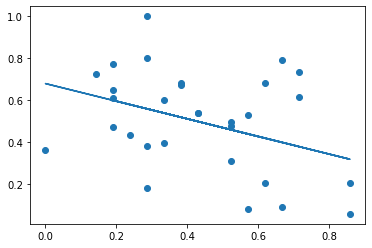

In [24]:
plt.plot(data_train_x,pred2)
plt.scatter(data_train_x,data_train_y)

In [25]:
#Mean square for testing data
data_test_pred = m*data_test['X'] + c
mse1 = mean_squared_error(data_test['Y'],data_test_pred)
print(mse1)

0.07415459516295382


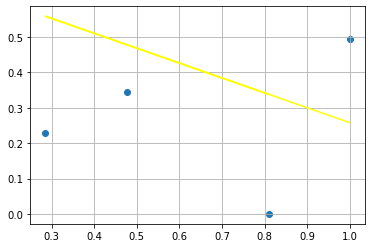

In [26]:
plt.scatter(data_test['X'],data_test['Y'])
plt.plot(data_test['X'],data_test_pred,'yellow')
plt.grid()

In [27]:
#predicting the bicarbonate in well water by giving ph as input
min_x = data['X'].min()
max_x = data['X'].max()
min_y = data['Y'].min()
max_y = data['Y'].max()

In [28]:
input_x = float(input("enter the pH of well water:"))
input_xx = input_x
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = output_y*(max_y - min_y) + min_y
print("Total number of bicarbonates in well water having pH =",input_xx,"is",output_y)

enter the pH of well water:3.5
Total number of bicarbonates in well water having pH = 3.5 is 334.71785252039723
